In [29]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta

import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Retrieve data using the built-in fashion_mnist dataset found within Keras. 
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

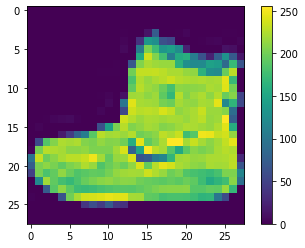

In [25]:
#Inspect the first image
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
# get shape of original images
img_rows, img_cols = X_train[0].shape

# restructure arrays for (rows, columns, channels)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# record new input shape for layers
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [36]:
# construct & compile CNN
model = Sequential()
model.add(
  Conv2D(64, 
         kernel_size=(3, 3),
         activation='relu',
         input_shape=input_shape)
         ) 
#2D convolutional layer leveraging 64 nodes and using a 3x3 filter

model.add(
  MaxPooling2D(
    pool_size=(2, 2)
    )
  )
#MaxPooling layer with a 2x2 kernel

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Loss function (crossentropy) and Optimizer (Adadelta)
model.compile(
  loss=keras.losses.categorical_crossentropy,
  optimizer=keras.optimizers.Adadelta(),
  metrics=['accuracy']
  )

In [37]:
# train the CNN
model.fit(
      X_train,
      y_train_cat,
      batch_size=128,
      epochs=10,
      verbose=1,
      validation_data=(X_test, y_test_cat)
      )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 419us/step - loss: 0.5612 - accuracy: 0.8020 - val_loss: 0.3805 - val_accuracy: 0.8637
Epoch 2/10
60000/60000 [==============================] - 25s 411us/step - loss: 0.3612 - accuracy: 0.8716 - val_loss: 0.3289 - val_accuracy: 0.8776
Epoch 3/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.3158 - accuracy: 0.8857 - val_loss: 0.2999 - val_accuracy: 0.8918
Epoch 4/10
60000/60000 [==============================] - 27s 449us/step - loss: 0.2891 - accuracy: 0.8956 - val_loss: 0.2938 - val_accuracy: 0.8917
Epoch 5/10
60000/60000 [==============================] - 28s 459us/step - loss: 0.2682 - accuracy: 0.9022 - val_loss: 0.2709 - val_accuracy: 0.8987
Epoch 6/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.2516 - accuracy: 0.9081 - val_loss: 0.2754 - val_accuracy: 0.8995
Epoch 7/10
60000/60000 [==============================] 

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                1038432   
_________________________________________________________________
dropout_2 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [38]:
# score the CNN
score = model.evaluate(X_test, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2619594150900841
Test accuracy: 0.9024999737739563


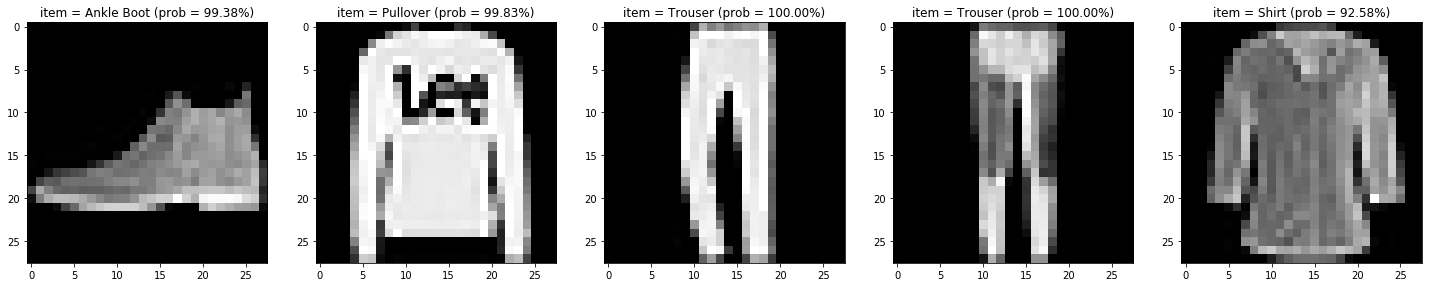

In [40]:
# visualize results
items = {
  0:'T-Shirt/Top',
  1:'Trouser',
  2:'Pullover', 
  3:'Dress',
  4:'Coat',
  5:'Sandal', 
  6:'Shirt',
  7:'Sneaker', 
  8:'Bag',
  9:'Ankle Boot'  
  }

plt.figure(figsize=(25,5))

for i, y in enumerate(y_test[0:5]):
  
  yhat = model.predict(X_test[i].reshape(1,28,28,1))
  
  s = plt.subplot(1,5,i+1)
  s.set_title('item = {0} (prob = {1:.2%})'.format( items[np.where(yhat == np.amax(yhat))[1][0]], np.amax(yhat)))
  plt.imshow(X_test[i][:,:,0], cmap='gray') 
  
display()